In [1]:
import skyflux as sf

Missing flux value for: GLEAM J202818-254302 at frequency: 204 MHz.
Missing flux value for: GLEAM J202818-254302 at frequency: 212 MHz.
Missing flux value for: GLEAM J202818-254302 at frequency: 220 MHz.
Missing flux value for: GLEAM J202818-254302 at frequency: 227 MHz.
Missing spectral index for: GLEAM J202818-254302


//anaconda3/envs/hera/lib/python3.8/site-packages/spin1_beam_model/jones_matrix_field.py:18: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.pos1_Elm_samples = h5f["pos1_Elm"].value
//anaconda3/envs/hera/lib/python3.8/site-packages/spin1_beam_model/jones_matrix_field.py:19: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.neg1_Elm_samples = h5f["neg1_Elm"].value
//anaconda3/envs/hera/lib/python3.8/site-packages/spin1_beam_model/jones_matrix_field.py:20: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.freq_nodes = h5f["frequencies"].value
//anaconda3/envs/hera/lib/python3.8/site-packages/spin1_beam_model/jones_matrix_field.py:21: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.L_model = h5f["spatial_bandlimit"].value
//anaconda3/envs/hera/lib/python3.8/site-packages/spin1_beam_model/jones_matrix_field.py:22: H5pyDeprec

delta_nu_in is 1000000.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Use 151 MHz as our reference point

def flux_interp (nu, source, vw=True):
    nu_index = nu / 1e6
    f = source.flux_by_frq.copy()
    if vw and nu_index in f:
        return source.flux_by_frq[nu_index]
    nu_ratio = nu / 151e6
    return f[151] * nu_ratio ** source.alpha

In [4]:
# The two sources that I will be using for demonstration purposes

yibai = sf.catalog.obj_catalog[99]
print(yibai)
print("Spectral index:", yibai.alpha, "\n")

erbai = sf.catalog.obj_catalog[199]
print(erbai)
print("Spectral index:", erbai.alpha)

Name: GLEAM J150341-351912
Right ascension: 225.92170833333333
Declination: -34.67986111111111
151 MHz flux: 1.022604

Spectral index: -1.028 

Name: GLEAM J110134-231618
Right ascension: 165.391875
Declination: -22.728166666666667
151 MHz flux: 1.039749

Spectral index: -0.55


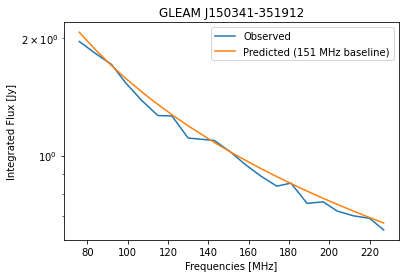

In [5]:
keys = np.array(list(yibai.flux_by_frq.keys()))
empir = np.array(list(yibai.flux_by_frq.values()))
predicted = np.array([flux_interp(nu * 1e6, yibai, vw=False) for nu in keys])

plt.plot(keys, empir, label="Observed")
plt.plot(keys, predicted, label="Predicted (151 MHz baseline)")
plt.xlabel("Frequencies [MHz]")
plt.ylabel("Integrated Flux [Jy]")
plt.yscale("log")
plt.title(yibai.name)
plt.legend()

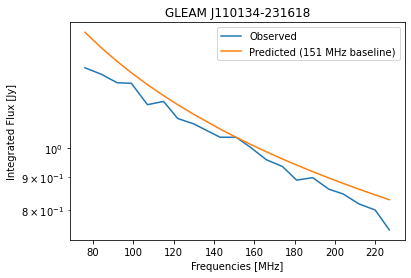

In [6]:
keys = np.array(list(erbai.flux_by_frq.keys()))
empir = np.array(list(erbai.flux_by_frq.values()))
predicted = np.array([flux_interp(nu * 1e6, erbai, vw=False) for nu in keys])

plt.plot(keys, empir, label="Observed")
plt.plot(keys, predicted, label="Predicted (151 MHz baseline)")
plt.xlabel("Frequencies [MHz]")
plt.ylabel("Integrated Flux [Jy]")
plt.yscale("log")
plt.title(erbai.name)
plt.legend()

In [16]:
nu_list = np.array([1e6 * i for i in range(76, 100)])

az_old = np.radians(20)
alts_old = np.array([90, 70, 50, 30, 10])

az = np.radians(50)
alts_deg = np.array([90, 85, 80, 75, 70])
alts = np.radians(alts_deg)

# constants for the LST plot
print("Azimuth", az)
print("Frequency interval", 1e6)
print("Reference point:", np.radians(-30.72))

list_A00 = []
list_A01 = []
list_A02 = []

for alt in alts:
    sublist_A00 = []
    sublist_A01 = []
    sublist_A02 = []
    
    for nu in nu_list:
        J = sf.stokes.create_J(az=az, alt=alt, nu=nu, radians=True)
        A = sf.stokes.create_A(J=J)
        sublist_A00.append(np.abs(A[0][0][0]))
        sublist_A01.append(np.abs(A[0][0][1]))
        sublist_A02.append(np.abs(A[0][0][2]))
    
    list_A00.append(np.array(sublist_A00))
    list_A01.append(np.array(sublist_A01))
    list_A02.append(np.array(sublist_A02))
        
list_A00 = np.array(list_A00)
list_A01 = np.array(list_A01)
list_A02 = np.array(list_A02)

Azimuth 0.8726646259971648
Frequency interval 1000000.0
Reference point: -0.536165146212658


In [17]:
def A_nu_plotter(list_A, title):
    for i in range(len(list_A)):
        plt.plot(nu_list / 1e6, list_A[i], label=str(alts_deg[i]))
    
    plt.xlabel("Frequency [MHz]")
    plt.ylabel(title)
    plt.title(title + " over frequency")
    plt.legend()

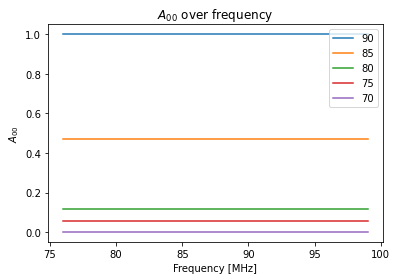

In [18]:
A_nu_plotter(list_A00, "$A_{00}$")

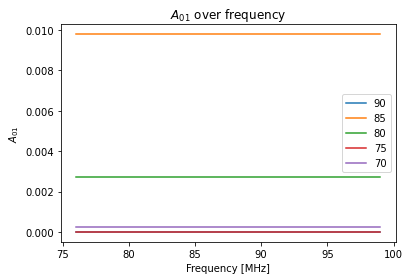

In [19]:
A_nu_plotter(list_A01, "$A_{01}$")

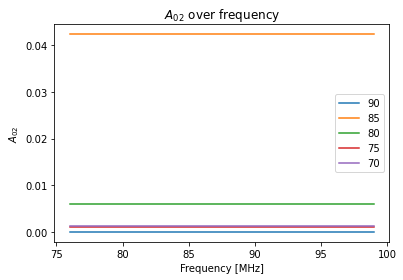

In [20]:
A_nu_plotter(list_A02, "$A_{02}$")

In [21]:
J = sf.stokes.create_J(az=az, alt=alts[0], nu=151e6, radians=True)
A = sf.stokes.create_A(J=J)
print(A)

[[[ 1.00000000e+00+0.j -3.33066907e-16+0.j -5.59373782e-16+0.j
   -3.12347829e-05+0.j]]

 [[-3.33066907e-16+0.j  9.99999999e-01+0.j  2.24924029e-05+0.j
   -1.87909177e-16+0.j]]

 [[-5.59367006e-16+0.j -2.24924029e-05+0.j  9.99999999e-01+0.j
    1.08492234e-20+0.j]]

 [[-3.12347829e-05+0.j  1.87919342e-16+0.j  1.08492234e-20+0.j
    1.00000000e+00+0.j]]]


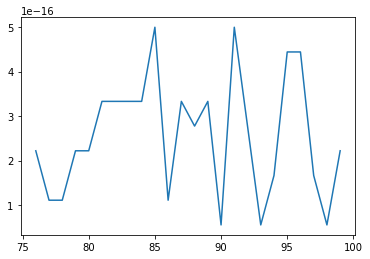

In [22]:
plt.plot(nu_list / 1e6, list_A01[0], label=str(alts_deg[0]))